**Problem Statement**

You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.

**Tasks to be done**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('customer_churn.csv')

In [1]:
df

NameError: name 'df' is not defined

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**1. Data Manipulation**

a)  Extract the 5th column and store it in ‘customer_5’

In [8]:
customer_5=df.iloc[:,4]
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [10]:
customer_5=df.loc[:,['Dependents']]
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


b) Extract the 15th column and store it in ‘customer_15’

In [9]:
customer_15=df.iloc[:,14]
customer_15

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

c) Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic'

In [11]:
#gender=Male,SeniorCitizen=1,Payment Method=Electronic check

In [12]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
senior_male_electronic=df[(df['gender']=='Male')&(df['SeniorCitizen']==1)&(df['PaymentMethod']=='Electronic check')]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


d) Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure'

In [14]:
#tenure>70 or Monthly charges>100

In [15]:
customer_total_tenure=df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


e) Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’.

In [16]:
#contract=2,payment method=mailed check,churn=yes

In [17]:
df.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [18]:
two_mail_yes=df[(df['Contract']=='Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


f) Extract 333 random records from the customer_churn dataframe and store
the result in ‘customer_333’.

In [19]:
customer_333=df.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1790,3096-IZETN,Female,0,No,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),78.10,947.3,Yes
4731,8748-HFWBO,Male,0,Yes,Yes,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,357.7,No
2584,3969-JQABI,Female,0,Yes,No,58,Yes,No,DSL,Yes,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),65.25,3791.6,No
2381,7649-PHJVR,Male,0,No,No,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,226.8,No
2436,6360-SVNWV,Female,1,No,No,31,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),73.55,2094.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,0661-XEYAN,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,25.80,25.8,Yes
5202,8591-TKMZH,Male,0,Yes,Yes,59,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Mailed check,111.10,6555.2,No
3209,8149-RSOUN,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,93.85,Yes
6741,2180-DXNEG,Female,0,No,No,12,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.00,1062.1,Yes


g) Get the count of different levels from the ‘Churn’ column.

In [20]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**2. Data Visualization**

● Build a bar-plot for the ’InternetService’ column:

a. Set x-axis label to ‘Categories of Internet Service’

b. Set y-axis label to ‘Count of Categories’

c. Set the title of plot to be ‘Distribution of Internet Service’

d. Set the color of the bars to be 'orange'

In [21]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [22]:
x=df['InternetService'].value_counts().keys().tolist()
x

['Fiber optic', 'DSL', 'No']

In [23]:
y=df['InternetService'].value_counts().tolist()
y

[3096, 2421, 1526]

Text(0.5, 1.0, 'Distribution of Internet Service')

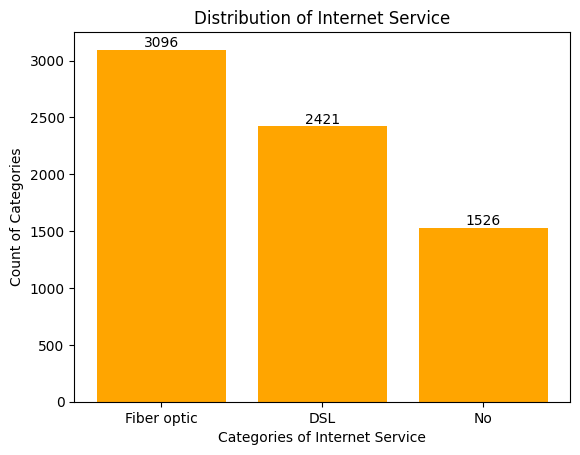

In [28]:
plt.bar(x,y,color='orange')
for i,count in enumerate(y):
    plt.text(i,count,str(count),ha='center',va='bottom')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

● Build a histogram for the ‘tenure’ column:

a. Set the number of bins to be 30

b. Set the color of the bins to be ‘green’

c. Assign the title 'Distribution of tenure'

Text(0.5, 1.0, 'Distribution of tenure')

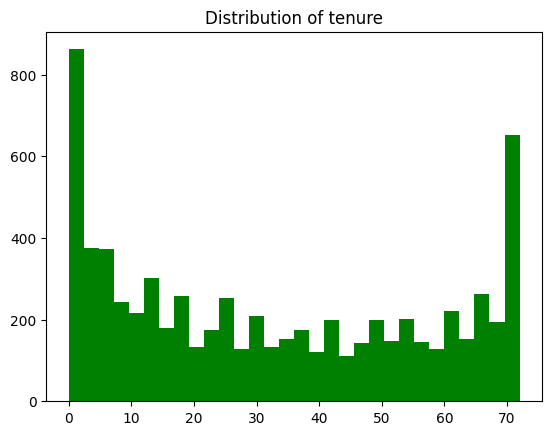

In [29]:
plt.hist(df['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')

● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:

a. Assign the points a color of ‘brown’

b. Set the x-axis label to ‘Tenure of customer’

c. Set the y-axis label to ‘Monthly Charges of customer’

d. Set the title to ‘Tenure vs Monthly Charges’

e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &

f. ‘Contract’ on the x-axis

In [30]:
x=df['tenure']
y=df['MonthlyCharges']

Text(0.5, 1.0, 'Tenure vs Monthly Charges')

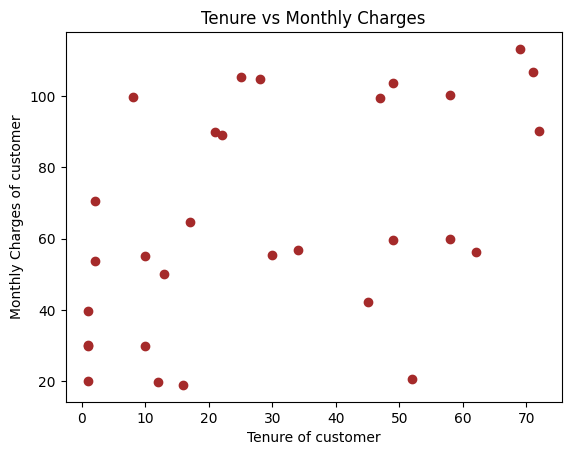

In [32]:
plt.scatter(x.head(30),y.head(30),color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

<AxesSubplot: title={'center': 'tenure'}, xlabel='[Contract]'>

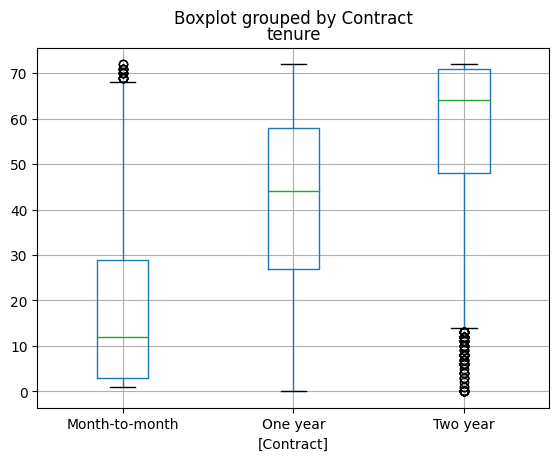

In [37]:
df.boxplot(column='tenure',by=['Contract'])

**5) Decision Tree:**

● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:

a. Divide the dataset in 80:20 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy


In [38]:
x=df.loc[:,['tenure']]
y=df.loc[:,['Churn']]

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dec_tree=DecisionTreeClassifier()

In [44]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred=dec_tree.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
confusion_matrix(y_test,y_pred)

array([[962,  78],
       [273,  96]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.7508871540099361

**6. Random Forest:**

● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:

a. Divide the dataset in 70:30 ratio

b. Build the model on train set and predict the values on test set

c. Build the confusion matrix and calculate the accuracy

In [51]:
x=df.loc[:,['MonthlyCharges','tenure']]
y=df.loc[:,['Churn']]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf=RandomForestClassifier()

In [56]:
rf.fit(x_train,y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_472\1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [57]:
y_pred=rf.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[1318,  231],
       [ 309,  255]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.7444391859914813